In [106]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
import contextily as ctx

import os
data_pth = "../Data/"

In [107]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [108]:
world.crs

{'init': 'epsg:4326'}

In [109]:
# GeoPandas comes with city data, but its just the capital cities, so I'll load in my own
cities = gpd.read_file(os.path.join(data_pth, "ne_10m_populated_places.shp"))

In [110]:
cities.crs

{'init': 'epsg:4326'}

In [111]:
cities.head()

,NAME,ADM0NAME,POP,geometry
0,Colonia del Sacramento,Uruguay,21714,POINT (-57.84000 -34.48000)
1,Trinidad,Uruguay,21093,POINT (-56.90100 -33.54400)
2,Fray Bentos,Uruguay,23279,POINT (-58.30400 -33.13900)
3,Canelones,Uruguay,19698,POINT (-56.28400 -34.53800)
4,Florida,Uruguay,32234,POINT (-56.21500 -34.09900)


In [112]:
Pittsburgh = cities.loc[cities['NAME'] == 'Pittsburgh']

In [113]:
Pitts_citybndry = gpd.read_file(os.path.join(data_pth, "Pittsburgh_City_Boundary.shp"))

In [114]:
Pitts_citybndry.crs

{'init': 'epsg:4326'}

In [115]:
Pitts_citybndry.head()

,OBJECTID,AREA,PERIMETER,BOUNDARY_,BOUNDARY_I,Shape_Leng,geometry
0,1,2.390814e+08,80995.806272,2,3,80995.807740,"POLYGON ((-80.05148 40.48350, -80.04982 40.484..."
1,2,7.809345e+06,13583.073713,3,4,13583.073648,"POLYGON ((-79.90150 40.48744, -79.90155 40.488..."
2,3,6.633454e+08,136797.979285,4,1,136797.978549,"POLYGON ((-79.88404 40.48246, -79.88417 40.481..."
3,4,6.426495e+06,13292.970311,5,5,13292.970433,"POLYGON ((-80.04105 40.46395, -80.04080 40.463..."
4,5,2.125020e+06,8998.423032,6,6,8998.422498,"POLYGON ((-79.97453 40.46628, -79.97462 40.466..."


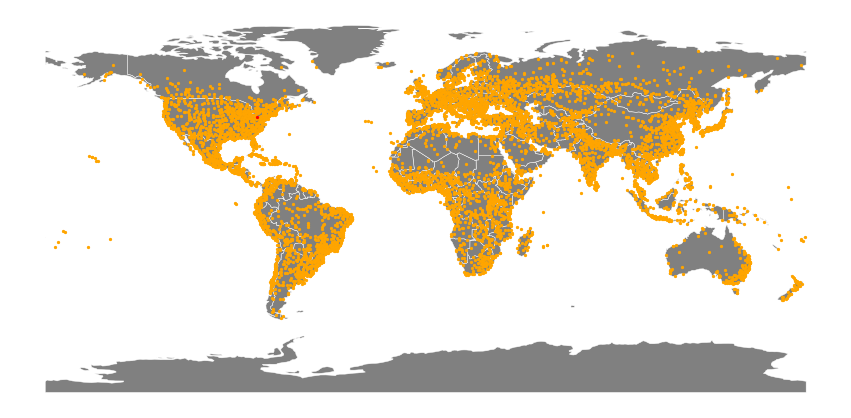

In [116]:
base = world.plot(color='grey', linewidth=0.5, edgecolor='white', figsize=(15,10))
cities.plot(ax=base, color='orange', markersize=5)
Pittsburgh.plot(ax=base, color='red', markersize=5)
base.set_axis_off()

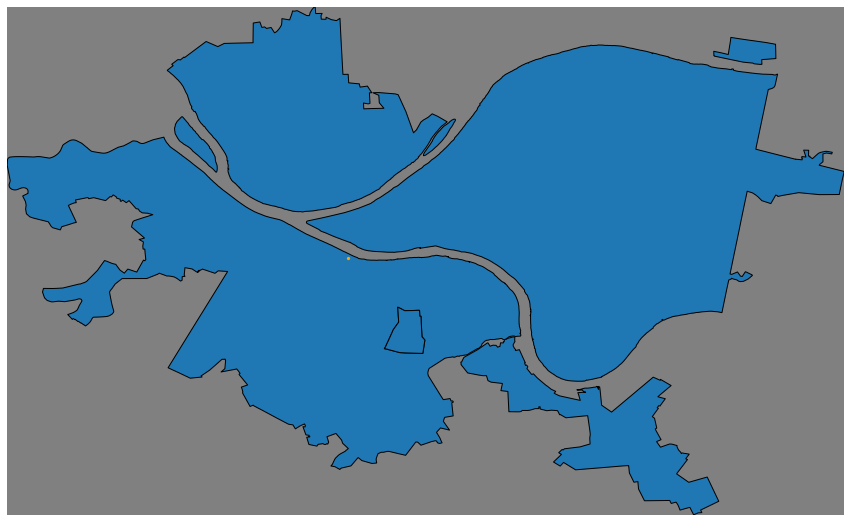

In [117]:
base = world.plot(color='grey', linewidth=0.5, edgecolor='white', figsize=(15,10))
Pitts_citybndry.plot(ax=base, edgecolor='black')
Pittsburgh.plot(ax=base, color='orange', markersize=5)

bounds = Pitts_citybndry.geometry.bounds
plt.xlim([bounds.minx.min(), bounds.maxx.max()])
plt.ylim([bounds.miny.min(), bounds.maxy.max()])
base.set_axis_off()

In [118]:
POI = pd.DataFrame(
    {'Name': ['David L. Lawrence Convention Center', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [119]:
world = world.to_crs(epsg=3857)
cities = cities.to_crs(epsg=3857)
Pitts_blkgrps = Pitts_blkgrps.to_crs(epsg=3857)
Pitts_citybndry = Pitts_citybndry.to_crs(epsg=3857)
Pittsburgh = Pittsburgh.to_crs(epsg=3857)

NameError: name 'Pittsburghs' is not defined

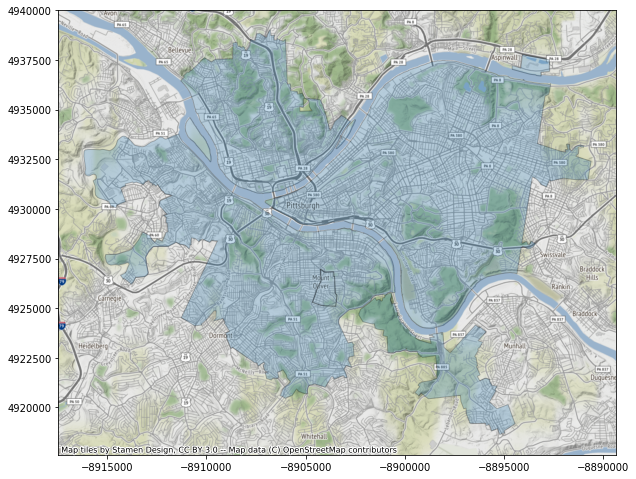

In [120]:
base = Pitts_citybndry.plot(figsize=(10, 10), alpha=0.25, edgecolor='k')
ctx.add_basemap(base)
Pittsburgh.plot(ax=base, alpha=0.25)
bounds = Pitts_blkgrps.geometry.bounds
plt.xlim([bounds.minx.min(), bounds.maxx.max()])
plt.ylim([bounds.miny.min(), bounds.maxy.max()])
base.set_axis_off()

In [ ]:
base = Pittsburgh.plot(figsize=(10, 10), alpha=0.25, edgecolor='k')
ctx.add_basemap(base,url=ctx.providers.Stamen.TonerLite)
bounds = Pittsburgh.geometry.bounds
plt.xlim([bounds.minx.min(), bounds.maxx.max()])
plt.ylim([bounds.miny.min(), bounds.maxy.max()])
base.set_axis_off()

In [ ]:
base = Pitts_blkgrps.plot(figsize=(10, 10), alpha=0.25, edgecolor='k')
ctx.add_basemap(base,url=ctx.providers.Stamen.Watercolor)
bounds = Pittsburgh.geometry.bounds
plt.xlim([bounds.minx.min(), bounds.maxx.max()])
plt.ylim([bounds.miny.min(), bounds.maxy.max()])
base.set_axis_off()